In [1]:
# Misc
import os
import umap
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression as mutual_inf
# Locals
import audio.audio_corrupts as corrupt
import audio.audio_model as audiotrain
import audio.audio_data as dataudio
# Torch
import torch
import torchaudio
from torch import nn
from torch.utils.data import DataLoader

get a batch

In [2]:
DATA = "C:\\audio_dataset\\UrbanSound8K"
np.random.seed(0)
file = os.path.join(DATA, "metadata", "UrbanSound8K.csv")
df = pd.read_csv(file)
df['relative_path'] = '\\audio' + '\\fold' + df['fold'].astype(str) + '\\' + df['slice_file_name'].astype(str)
df['corrupt'] = np.random.rand(len(df))
df = df[['relative_path', 'classID', 'corrupt']]
train, val = train_test_split(df, test_size=0.2,random_state=420)
train, val = train.reset_index(drop = True), val.reset_index(drop = True) 

print(val.head())
train_ds = dataudio.SoundDS(train, DATA, transform = True)
val_ds = dataudio.SoundDS(val, DATA, transform = False)

train_dl = torch.utils.data.DataLoader(train_ds, batch_size=250, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=250, shuffle=False)

                     relative_path  classID   corrupt
0     \audio\fold5\17578-5-0-2.wav        5  0.646628
1  \audio\fold1\193698-2-0-114.wav        2  0.479139
2     \audio\fold6\66623-4-0-2.wav        4  0.367986
3      \audio\fold1\9031-3-2-0.wav        3  0.048076
4    \audio\fold7\168846-5-1-4.wav        5  0.095380


In [3]:
for i, batch in enumerate(val_dl):
    data = batch
    break

model

In [4]:
# state = torch.load('train_params\\clean\\clean_200.pt')
# model = audiotrain.AudioModel()
# model.load_state_dict(state["params"])

<All keys matched successfully>

In [23]:
# reducer = umap.UMAP()
# x, y = data
# out = model.encode(x, 2).detach().reshape(250, -1).t()
# x = x.reshape(250, -1)

In [35]:
# x.size()

torch.Size([250, 44032])

In [4]:
iters = [1,10, 50, 80, 100, 150, 200]
l2o = []
i2l = []
for i in range(len(iters)):
    print(f"iter {i+1}/{len(iters)}")
    state = torch.load(f'train_params\\clean\\clean_{iters[i]}.pt')
    model = audiotrain.AudioModel()
    model.load_state_dict(state["params"])
    #
    x, y = data
    out = model.encode(x, 2).detach().reshape(250, -1).t()
    x = x.reshape(250, -1)
    #
    layer2out = mutual_inf(out.t(), y)
    in2layer = 0
    for j in range(0, 8):
        print(f"    feature {j + 1}")
        in2layer += mutual_inf(x, out[j])
    l2o.append(layer2out.mean())
    i2l.append(in2layer.mean())

In [38]:
print(l2o)
len(l2o)

[0.1231274149161016, 0.11964238791884906, 0.11564493324836098, 0.11186553113647991, 0.11105945095933004, 0.10875888142331115, 0.10383703213011627]


7

In [39]:
print(i2l)
len(i2l)

[0.44104682964926434, 0.5424479349634651, 0.6221041520488876, 0.6140490555465558, 0.6140867548305313, 0.614766919760958, 0.5885531839015582]


7

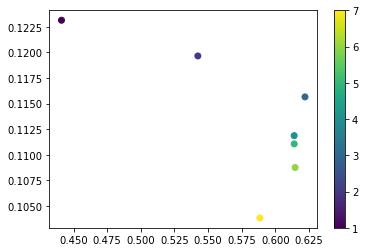

In [41]:
plt.scatter(x = i2l, y = l2o, c= [1,2,3,4, 5, 6, 7])
plt.xlabel("i2l")
plt.ylabel("l2o")
plt.colorbar()

In [ ]:
mutual_inf(x, awa[0])

array([0.94153622, 1.05294606, 0.97443943, ..., 0.44916444, 0.47710718,
       0.4499111 ])

In [ ]:
embedding = reducer.fit_transform(awa)
print(embedding)

[[-2.2977848   3.7250195 ]
 [ 7.862205    6.166037  ]
 [ 0.30327573  7.2500834 ]
 [ 4.8211136   7.2082467 ]
 [ 8.741609    5.583044  ]
 [-2.3850393   3.3241477 ]
 [11.355143    3.2084603 ]
 [-2.1905677   4.677459  ]
 [ 2.2915103   8.498811  ]
 [ 2.0085936   8.866209  ]
 [ 5.686702    6.430809  ]
 [ 2.435308    9.338016  ]
 [ 8.348877    5.002508  ]
 [-1.3561319   4.3268456 ]
 [-3.2223773   4.9250236 ]
 [-2.3155515   4.595391  ]
 [10.7807255   2.7273734 ]
 [-0.7338241   4.5357656 ]
 [-0.02644105  6.8101993 ]
 [ 8.398214    4.64194   ]
 [ 8.538699    3.5911515 ]
 [-1.5854307   4.1935735 ]
 [-3.077206    4.585286  ]
 [-2.5547693   4.218985  ]
 [ 7.945829    6.574765  ]
 [-3.1725953   4.8285074 ]
 [ 5.748373    6.1688514 ]
 [ 7.0371504   4.566001  ]
 [ 6.6124983   6.7116947 ]
 [ 1.5131507   8.705071  ]
 [ 2.5083823   9.400297  ]
 [ 7.266891    4.4394274 ]
 [-2.3077698   4.228129  ]
 [ 7.9597178   6.334383  ]
 [-2.6820557   3.0706723 ]
 [ 5.6627235   5.297073  ]
 [ 2.420691    8.487398  ]
 